In [1]:
#importing packages
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # data visualization
import seaborn as sns 
%matplotlib inline

# Importing csv files
# Input data files are available in the "../input/" directory.
train = pd.read_csv("./train.csv") 
test = pd.read_csv("./test.csv")
train.sample(5)



,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
627,628,1,1,"Longley, Miss. Gretchen Fiske",female,21.0,0,0,13502,77.9583,D9,S
858,859,1,3,"Baclini, Mrs. Solomon (Latifa Qurban)",female,24.0,0,3,2666,19.2583,NaN,C
126,127,0,3,"McMahon, Mr. Martin",male,NaN,0,0,370372,7.7500,NaN,Q
462,463,0,1,"Gee, Mr. Arthur H",male,47.0,0,0,111320,38.5000,E63,S
304,305,0,3,"Williams, Mr. Howard Hugh ""Harry""",male,NaN,0,0,A/5 2466,8.0500,NaN,S


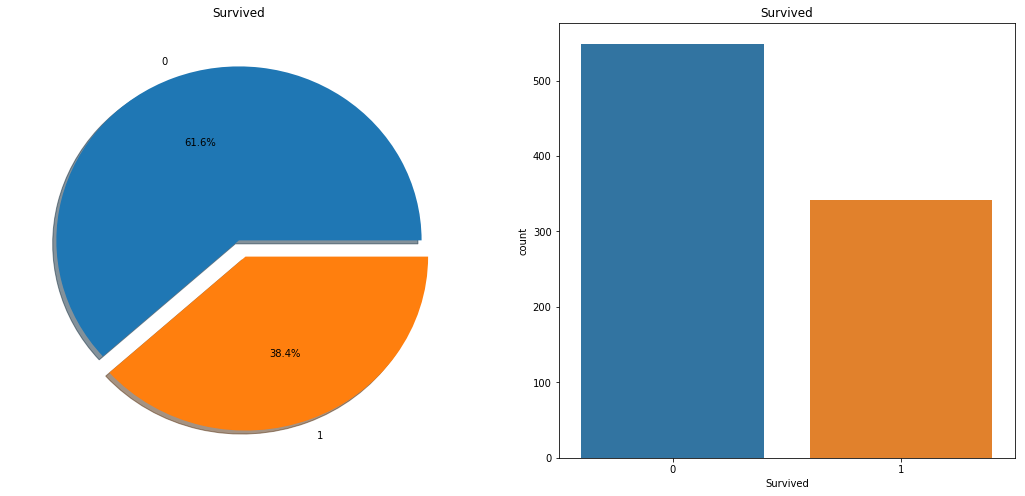

In [2]:
# visualization
import seaborn as sns
import matplotlib.pyplot as plt
f, ax=plt.subplots(1, 2, figsize=(18,8))
train['Survived'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')
sns.countplot('Survived',data=train,ax=ax[1])
ax[1].set_title('Survived')
plt.show()

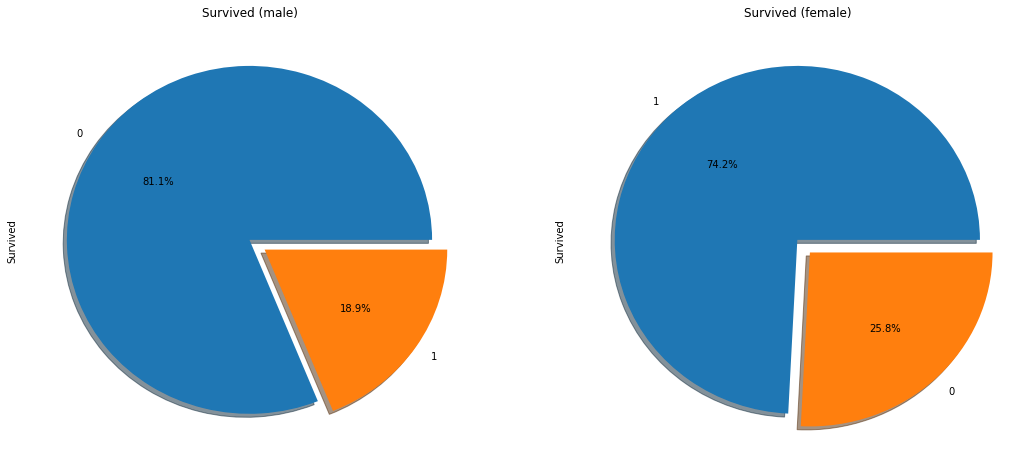

In [3]:
f,ax=plt.subplots(1,2,figsize=(18,8))
train['Survived'][train['Sex']=='male'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
train['Survived'][train['Sex']=='female'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[1],shadow=True)
ax[0].set_title('Survived (male)')
ax[1].set_title('Survived (female)')
plt.show()

In [4]:
pd.crosstab([train['Sex'],train['Survived']],train['Pclass'],margins=True).style.background_gradient(cmap='summer_r')


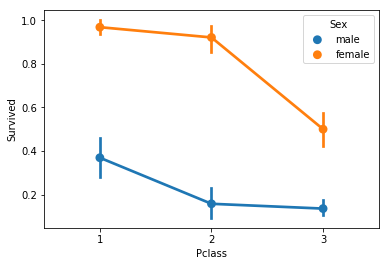

In [5]:
sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=train)


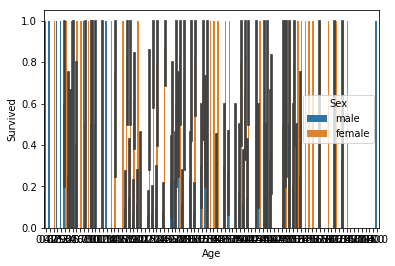

In [6]:
sns.barplot(x="Age", y="Survived", hue="Sex", data=train)


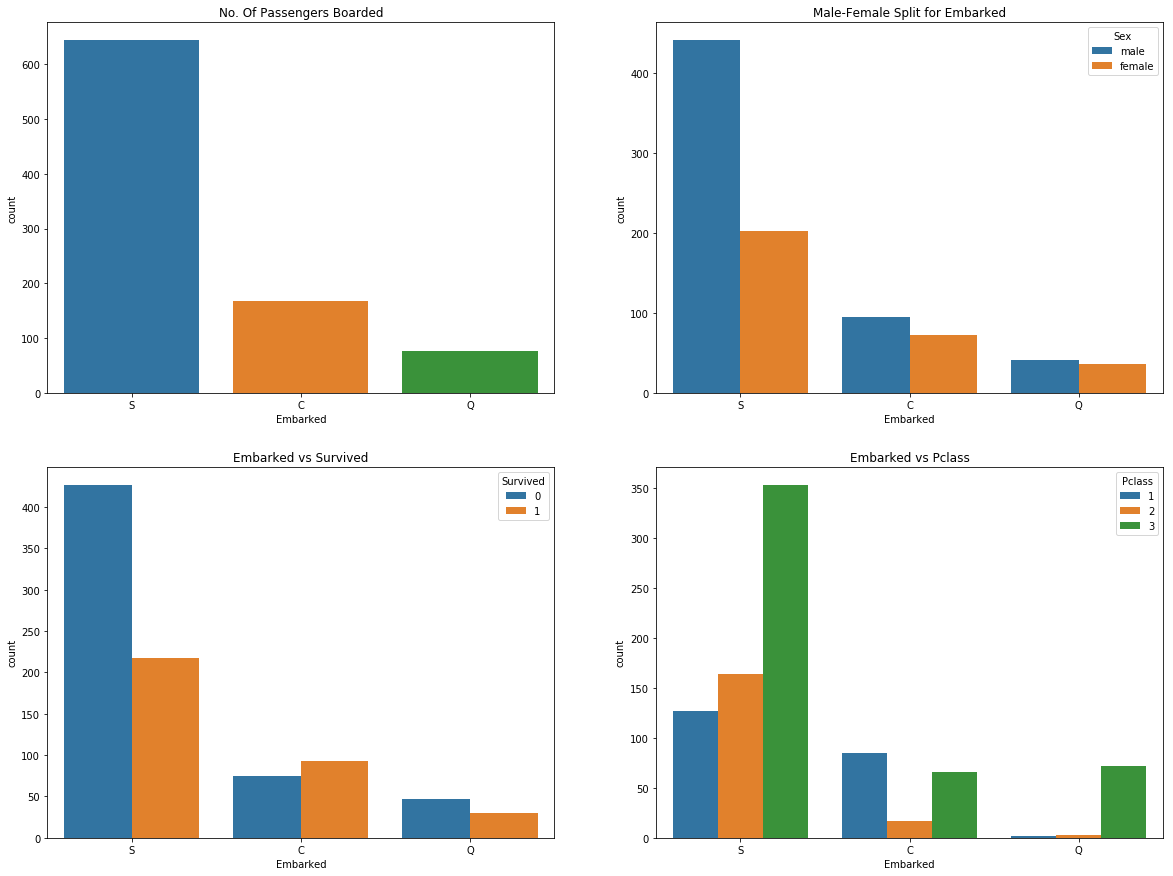

In [7]:
f, ax = plt.subplots(2, 2, figsize=(20,15))
sns.countplot('Embarked', data=train,ax=ax[0,0])
ax[0,0].set_title('No. Of Passengers Boarded')
sns.countplot('Embarked',hue='Sex',data=train,ax=ax[0,1])
ax[0,1].set_title('Male-Female Split for Embarked')
sns.countplot('Embarked',hue='Survived',data=train,ax=ax[1,0])
ax[1,0].set_title('Embarked vs Survived')
sns.countplot('Embarked',hue='Pclass',data=train,ax=ax[1,1])
ax[1,1].set_title('Embarked vs Pclass')
plt.show()

In [8]:
train.isnull().sum()



PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
train['Embarked'].fillna('S',inplace=True)


In [10]:
train.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [11]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics #accuracy measure
trainData, testData = train_test_split(train, test_size=0.3,random_state=0)
target_col = ['Pclass', 'Sex', 'Embarked']
train_X=trainData[target_col]
train_Y=trainData['Survived']
test_X=testData[target_col]
test_Y=testData['Survived']
features_one = train_X.values
target = train_Y.values
tree_model = DecisionTreeClassifier()
tree_model.fit(features_one, target)
dt_prediction = tree_model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(dt_prediction, test_Y))


ValueError: could not convert string to float: 'S'

In [12]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics #accuracy measure
trainData, testData = train_test_split(train, test_size=0.3,random_state=0)
target_col = ['Pclass', 'Sex', 'Embarked']

combin = pd.concat([train[target_col], test[target_col]])

for feature in target_col:
    le = preprocessing.LabelEncoder()
    le = le.fit(combin[feature])
    train[feature] = le.transform(train[feature])
    test[feature] = le.transform(test[feature])



In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics #accuracy measure
trainData, testData = train_test_split(train, test_size=0.3,random_state=0)
target_col = ['Pclass', 'Sex', 'Embarked']
train_X=trainData[target_col]
train_Y=trainData['Survived']
test_X=testData[target_col]
test_Y=testData['Survived']
features_one = train_X.values
target = train_Y.values
tree_model = DecisionTreeClassifier()
tree_model.fit(features_one, target)
dt_prediction = tree_model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(dt_prediction, test_Y))

The accuracy of the Decision Tree is 0.8097014925373134


In [14]:
test.Age = test.Age.fillna(-0.5)
train.Age = train.Age.fillna(-0.5)

In [15]:
bins = (-1, 0, 5, 12, 18, 25, 35, 60, 120)
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
categories1 = pd.cut(train.Age, bins, labels=group_names)
categories2 = pd.cut(test.Age, bins, labels=group_names)
train.Age = categories1
test.Age = categories2

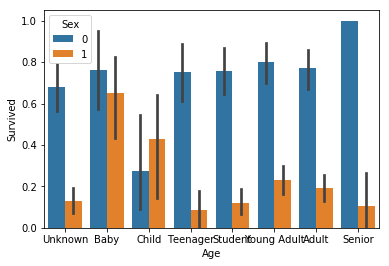

In [16]:
sns.barplot(x="Age", y="Survived", hue="Sex", data=train)


In [17]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics #accuracy measure
trainData, testData = train_test_split(train, test_size=0.3,random_state=0)
target_col = ['Pclass', 'Age', 'Sex', 'Embarked']

combin = pd.concat([train[target_col], test[target_col]])

for feature in target_col:
    le = preprocessing.LabelEncoder()
    le = le.fit(combin[feature])
    train[feature] = le.transform(train[feature])
    test[feature] = le.transform(test[feature])


In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics #accuracy measure
trainData, testData = train_test_split(train, test_size=0.3,random_state=0)
target_col = ['Pclass','Age', 'Sex', 'Embarked']
train_X=trainData[target_col]
train_Y=trainData['Survived']
test_X=testData[target_col]
test_Y=testData['Survived']
features_one = train_X.values
target = train_Y.values
tree_model = DecisionTreeClassifier()
tree_model.fit(features_one, target)
dt_prediction = tree_model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(dt_prediction, test_Y))

The accuracy of the Decision Tree is 0.7835820895522388


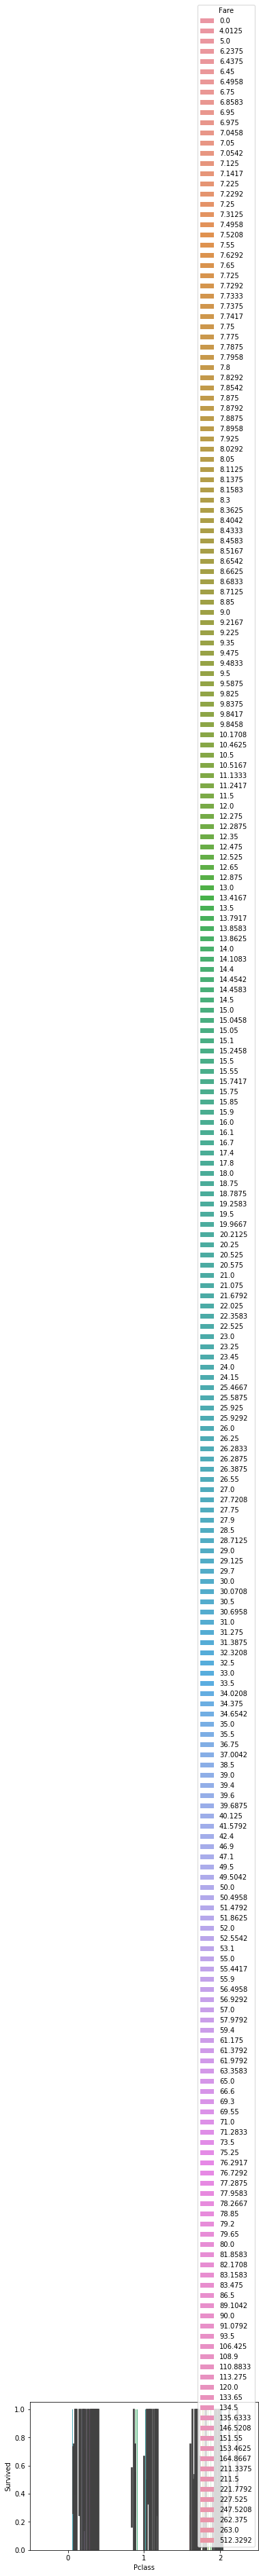

In [19]:
sns.barplot(x="Pclass", y="Survived", hue="Fare", data=train)


In [20]:
train.Fare.isnull().sum()
test.Fare.isnull().sum()

1

In [21]:
train.Fare.fillna(-0.5)
test.Fare.fillna(-0.5)


0        7.8292
1        7.0000
2        9.6875
3        8.6625
4       12.2875
5        9.2250
6        7.6292
7       29.0000
8        7.2292
9       24.1500
10       7.8958
11      26.0000
12      82.2667
13      26.0000
14      61.1750
15      27.7208
16      12.3500
17       7.2250
18       7.9250
19       7.2250
20      59.4000
21       3.1708
22      31.6833
23      61.3792
24     262.3750
25      14.5000
26      61.9792
27       7.2250
28      30.5000
29      21.6792
         ...   
388      7.7500
389     21.0750
390     93.5000
391     39.4000
392     20.2500
393     10.5000
394     22.0250
395     60.0000
396      7.2500
397     79.2000
398      7.7750
399      7.7333
400    164.8667
401     21.0000
402     59.4000
403     47.1000
404     27.7208
405     13.8625
406     10.5000
407    211.5000
408      7.7208
409     13.7750
410      7.7500
411     90.0000
412      7.7750
413      8.0500
414    108.9000
415      7.2500
416      8.0500
417     22.3583
Name: Fare, Length: 418,

In [27]:
if train.Fare.isnull()[0]:
    print("true")


In [34]:
for fare in train.Fare:
    if fare:
        print(fare)

7.25
71.2833
7.925
53.1
8.05
8.4583
51.8625
21.075
11.1333
30.0708
16.7
26.55
8.05
31.275
7.8542
16.0
29.125
13.0
18.0
7.225
26.0
13.0
8.0292
35.5
21.075
31.3875
7.225
263.0
7.8792
7.8958
27.7208
146.5208
7.75
10.5
82.1708
52.0
7.2292
8.05
18.0
11.2417
9.475
21.0
7.8958
41.5792
7.8792
8.05
15.5
7.75
21.6792
17.8
39.6875
7.8
76.7292
26.0
61.9792
35.5
10.5
7.2292
27.75
46.9
7.2292
80.0
83.475
27.9
27.7208
15.2458
10.5
8.1583
7.925
8.6625
10.5
46.9
73.5
14.4542
56.4958
7.65
7.8958
8.05
29.0
12.475
9.0
9.5
7.7875
47.1
10.5
15.85
34.375
8.05
263.0
8.05
8.05
7.8542
61.175
20.575
7.25
8.05
34.6542
63.3583
23.0
26.0
7.8958
7.8958
77.2875
8.6542
7.925
7.8958
7.65
7.775
7.8958
24.15
52.0
14.4542
8.05
9.825
14.4583
7.925
7.75
21.0
247.5208
31.275
73.5
8.05
30.0708
13.0
77.2875
11.2417
7.75
7.1417
22.3583
6.975
7.8958
7.05
14.5
26.0
13.0
15.0458
26.2833
53.1
9.2167
79.2
15.2458
7.75
15.85
6.75
11.5
36.75
7.7958
34.375
26.0
13.0
12.525
66.6
8.05
14.5
7.3125
61.3792
7.7333
8.05
8.6625
69.55
16.1
15.

In [35]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics #accuracy measure
trainData, testData = train_test_split(train, test_size=0.3,random_state=0)
target_col = ['Pclass', 'Age', 'Sex', 'Embarked', 'Fare']

combin = pd.concat([train[target_col], test[target_col]])

for feature in target_col:
    le = preprocessing.LabelEncoder()
    le = le.fit(combin[feature])
    train[feature] = le.transform(train[feature])
    test[feature] = le.transform(test[feature])


ValueError: y contains new labels: [nan]

In [36]:
bins2 = (-1, 0, 8, 15, 31, 1000)
group_names2 = ['0', '1', '2', '3', '4']
categories3 = pd.cut(train.Fare, bins2, labels=group_names2)
categories4 = pd.cut(test.Fare, bins2, labels=group_names2)
train.Fare = categories3
test.Fare = categories4

In [37]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,2,"Braund, Mr. Owen Harris",1,4,1,0,A/5 21171,3,NaN,2
1,2,1,0,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,0,1,0,PC 17599,4,C85,0
2,3,1,2,"Heikkinen, Miss. Laina",0,7,0,0,STON/O2. 3101282,4,NaN,2
3,4,1,0,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,7,1,0,113803,4,C123,2
4,5,0,2,"Allen, Mr. William Henry",1,7,0,0,373450,4,NaN,2
5,6,0,2,"Moran, Mr. James",1,6,0,0,330877,4,NaN,1
6,7,0,0,"McCarthy, Mr. Timothy J",1,0,0,0,17463,4,E46,2
7,8,0,2,"Palsson, Master. Gosta Leonard",1,1,3,1,349909,4,NaN,2
8,9,1,2,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",0,7,0,2,347742,4,NaN,2
9,10,1,1,"Nasser, Mrs. Nicholas (Adele Achem)",0,5,1,0,237736,4,NaN,0


In [40]:
from sklearn import preprocessing
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics #accuracy measure
trainData, testData = train_test_split(train, test_size=0.3,random_state=0)
target_col = ['Pclass', 'Age', 'Sex', 'Fare', 'Embarked']

combin = pd.concat([train[target_col], test[target_col]])

for feature in target_col:
    le = preprocessing.LabelEncoder()
    le = le.fit(combin[feature])
    train[feature] = le.transform(train[feature])
    test[feature] = le.transform(test[feature])


TypeError: '<' not supported between instances of 'str' and 'float'

In [41]:
train.Fare

0      3
1      4
2      4
3      4
4      4
5      4
6      4
7      4
8      4
9      4
10     4
11     4
12     4
13     4
14     4
15     4
16     4
17     4
18     4
19     3
20     4
21     4
22     4
23     4
24     4
25     4
26     3
27     4
28     4
29     4
      ..
861    4
862    4
863    4
864    4
865    4
866    4
867    4
868    4
869    4
870    4
871    4
872    1
873    4
874    4
875    3
876    4
877    4
878    4
879    4
880    4
881    4
882    4
883    4
884    2
885    4
886    4
887    4
888    4
889    4
890    4
Name: Fare, Length: 891, dtype: category
Categories (5, object): [0 < 1 < 2 < 3 < 4]

In [43]:
target_col

['Pclass', 'Age', 'Sex', 'Fare', 'Embarked']

In [44]:
combin = pd.concat([train[target_col], test[target_col]])


In [45]:
combin

,Pclass,Age,Sex,Fare,Embarked
0,2,4,1,3,2
1,0,0,0,4,0
2,2,7,0,4,2
3,0,7,0,4,2
4,2,7,1,4,2
5,2,6,1,4,1
6,0,0,1,4,2
7,2,1,1,4,2
8,2,7,0,4,2
9,1,5,0,4,0


In [68]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics #accuracy measure
trainData, testData = train_test_split(train, test_size=0.3,random_state=0)
target_col = ['Pclass','Age', 'Sex','Fare', 'Embarked']
train_X=trainData[target_col]
train_Y=trainData['Survived']
test_X=testData[target_col]
test_Y=testData['Survived']
features_one = train_X.values
target = train_Y.values
tree_model = DecisionTreeClassifier()
tree_model.fit(features_one, target)
dt_prediction = tree_model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(dt_prediction, test_Y))

The accuracy of the Decision Tree is 0.8097014925373134


In [69]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics #accuracy measure
trainData, testData = train_test_split(train, test_size=0.3,random_state=0)
target_col = ['Pclass','Age', 'Sex', 'Embarked']
train_X=trainData[target_col]
train_Y=trainData['Survived']
test_X=testData[target_col]
test_Y=testData['Survived']
features_one = train_X.values
target = train_Y.values
tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=3, min_samples_leaf=5)
tree_model.fit(features_one, target)
dt_prediction = tree_model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(dt_prediction, test_Y))

The accuracy of the Decision Tree is 0.8134328358208955


In [65]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics #accuracy measure
trainData, testData = train_test_split(train, test_size=0.3,random_state=0)
target_col = ['Pclass','Age', 'Sex', 'Fare', 'Embarked']
train_X=trainData[target_col]
train_Y=trainData['Survived']
test_X=testData[target_col]
test_Y=testData['Survived']
features_one = train_X.values
target = train_Y.values
tree_model = RandomForestClassifier(n_estimators=10, random_state=33)

acc_scorer = make_scorer(accuracy_score)
# Run the grid search
grid_obj = GridSearchCV(tree_model, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(train_X, train_Y)

# Set the clf to the best combination of parameters
tree_model = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
tree_model.fit(train_X, train_Y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=5, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=33, verbose=0, warm_start=False)

In [66]:
predictions = tree_model.predict(test_X)
print(accuracy_score(test_Y, predictions))

0.8097014925373134


In [70]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics #accuracy measure
trainData, testData = train_test_split(train, test_size=0.3,random_state=0)
target_col = ['Pclass','Age', 'Sex', 'Embarked']
train_X=trainData[target_col]
train_Y=trainData['Survived']
test_X=testData[target_col]
test_Y=testData['Survived']
features_one = train_X.values
target = train_Y.values
tree_model = RandomForestClassifier(n_estimators=10, random_state=33)

acc_scorer = make_scorer(accuracy_score)
# Run the grid search
grid_obj = GridSearchCV(tree_model, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(train_X, train_Y)

# Set the clf to the best combination of parameters
tree_model = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
tree_model.fit(train_X, train_Y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=8, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=33, verbose=0, warm_start=False)

In [71]:
predictions = tree_model.predict(test_X)
print(accuracy_score(test_Y, predictions))

0.8134328358208955


In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics #accuracy measure
trainData, testData = train_test_split(train, test_size=0.3,random_state=0)
target_col = ['Pclass', 'Sex', 'Embarked']
train_X=trainData[target_col]
train_Y=trainData['Survived']
test_X=testData[target_col]
test_Y=testData['Survived']
features_one = train_X.values
target = train_Y.values
tree_model = RandomForestClassifier(n_estimators=10, random_state=33)

acc_scorer = make_scorer(accuracy_score)
# Run the grid search
grid_obj = GridSearchCV(tree_model, parameters, scoring=acc_scorer)
grid_obj = grid_obj.fit(train_X, train_Y)

# Set the clf to the best combination of parameters
tree_model = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
tree_model.fit(train_X, train_Y)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=5, max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=5, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=9, n_jobs=1,
            oob_score=False, random_state=33, verbose=0, warm_start=False)

In [73]:
predictions = tree_model.predict(test_X)
print(accuracy_score(test_Y, predictions))

0.7947761194029851
